# Fungsi Fuzzifikasi

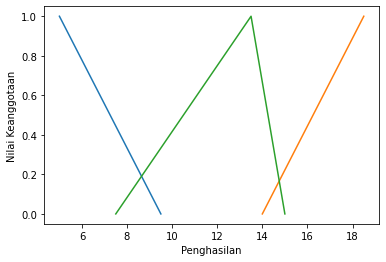

In [1]:
'''
Fungsi Keanggotaan untuk Penghasilan
range sedikit : x <= 9.5
range sedang  : 7.5 <= x <= 15
range banyak  : x >= 14
'''
def penghasilanSedikit(x):#Fungsi Linear Turun
    if x >= 9.5:
        return 0
    elif x <= 5:
        return 1
    else:
        return (9.5-x)/(9.5-5)
    
def penghasilanSedang(x):#Fungsi Segitiga
    if x <= 7.5 or x >= 15:
        return 0
    elif 7.5 <= x <= 13.5:
        return (x-7.5)/(13.5-7.5)
    else:
        return (15-x)/(15-13.5)

def penghasilanBanyak(x):#Fungsi Linear Naik
    if x >= 18.5:
        return 1
    elif x <= 14:
        return 0
    else:
        return (x-14)/(18.5-14)

#Fungsi untuk mengembalikan setiap nilai keanggotaan pada Penghasilan
def fungsiPenghasilan(x): 
    Sedikit = penghasilanSedikit(x)
    Sedang = penghasilanSedang(x)
    Banyak = penghasilanBanyak(x)
    return Sedikit, Sedang, Banyak

import matplotlib.pyplot as plt

plt.plot([5, 9.5], [1, 0])
plt.plot([14, 18.5], [0, 1])
plt.plot([7.5, 13.5, 15], [0, 1, 0])
plt.ylabel('Nilai Keanggotaan')
plt.xlabel('Penghasilan')
plt.show()

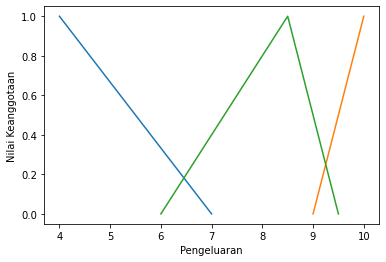

In [2]:
'''
Fungsi Keanggotaan untuk Pengeluaran
range hemat  : x <= 7
range normal : 6 <= x <= 9.5
range boros  : x >= 9
'''
def pengeluaranHemat(x):#Fungsi Linera TUrun
    if x >= 7:
        return 0
    elif x <= 4:
        return 1
    else:
        return (7-x)/(7-4)
    
def pengeluaranNormal(x):#Fungsi Segitiga
    if x <= 6 or x >= 9.5:
        return 0
    elif 6 <= x <= 8.5:
        return (x-6)/(8.5-6)
    else:
        return (9.5-x)/(9.5-8.5)

def pengeluaranBoros(x):#Fungsi Linear Naik
    if x >= 10:
        return 1
    elif x <= 9:
        return 0
    else:
        return (x-9)/(10-9)

#Fungsi untuk mengembalikan setiap nilai keanggotaan pada Penghasilan
def fungsiPengeluaran(x): 
    Hemat = pengeluaranHemat(x)
    Normal = pengeluaranNormal(x)
    Boros = pengeluaranBoros(x)
    return Hemat, Normal, Boros

import matplotlib.pyplot as plt

plt.plot([4, 7], [1, 0])
plt.plot([9, 10], [0, 1])
plt.plot([6, 8.5, 9.5], [0, 1, 0])
plt.ylabel('Nilai Keanggotaan')
plt.xlabel('Pengeluaran')
plt.show()

# Fungsi Inferensi

In [3]:
#Fungsi Rules, Metode Sugeno Singleton
def inferenceRules(Sedikit, Sedang, Banyak, Hemat, Normal, Boros):
    #Array kosong untuk setiap singleton
    ya = [0]
    mungkin = [0]
    tidak = [0]
    
    #Rules "ya"
    if Sedikit != 0 and Hemat != 0:
        ya.append(min(Sedikit,Hemat))
    if Sedikit != 0 and Normal != 0:
        ya.append(min(Sedikit,Normal))
    if Sedang != 0 and Hemat != 0:
        ya.append(min(Sedang,Hemat))
    
    #Rules "mungkin"
    if Sedikit != 0 and Boros != 0:
        mungkin.append(min(Sedikit,Boros))
    if Sedang != 0 and Normal != 0:
        mungkin.append(min(Sedang,Normal))
    if Banyak != 0 and Hemat != 0:
        mungkin.append(min(Banyak,Hemat))
        
    #Rules "tidak"
    if Sedang != 0 and Boros != 0:
        tidak.append(min(Sedang,Boros))
    if Banyak != 0 and Normal != 0:
        tidak.append(min(Banyak,Normal))
    if Banyak != 0 and Boros != 0:
        tidak.append(min(Banyak,Boros))
    
    s1 = max(ya)
    s2 = max(mungkin)
    s3 = max(tidak)
    
    return s1, s2, s3

# Fungsi Defuzzifikasi

In [4]:
#Menggunakan Metode Sugeno, Weighted Average
def weightedAverage(s1, s2, s3):
    return ((s1 * 1) + (s2 * 0.5) + (s3 * 0)) / (s1 + s2 + s3)

# Main Program

In [5]:
import pandas as pd

#Membaca Data dari file
df = pd.read_excel('Mahasiswa.xls')
print(df)

     Id  Penghasilan  Pengeluaran
0     1        18.76         9.68
1     2         8.35         4.52
2     3        17.03        10.11
3     4         8.23         9.25
4     5        16.89         6.99
..  ...          ...          ...
95   96        17.31        10.00
96   97        18.85         9.78
97   98        14.52        10.32
98   99         9.83        10.64
99  100         7.84         3.44

[100 rows x 3 columns]


In [6]:
id_list = []
z_list = []

for data in df.itertuples():
    #Assign data ke variabel untuk diproses
    x = getattr(data, 'Penghasilan')
    y = getattr(data, 'Pengeluaran')
    id_num = getattr(data, 'Id')
    
    '''
    Proses mencari nilai keanggotaan dari data:
    x1 = nilai keanggotaan data di area "sedikit"
    x2 = nilai keanggotaan data di area "sedang"
    x3 = nilai keanggotaan data di area "banyak"
    y1 = nilai keanggotaan data di area "hemat"
    y2 = nilai keanggotaan data di area "normal"
    y3 = nilai keanggotaan data di area "boros"
    '''
    x1, x2, x3 = fungsiPenghasilan(x)
    y1, y2, y3 = fungsiPengeluaran(y)
    
    '''
    Proses inferensi:
    s1 = variabel untuk proses inferensi dari nilai fuzzy input menjadi fuzzy output "ya"
    s2 = variabel untuk proses inferensi dari nilai fuzzy input menjadi fuzzy output "mungkin"
    s3 = variabel untuk proses inferensi dari nilai fuzzy input menjadi fuzzy output "tidak"
    '''
    s1, s2, s3 = inferenceRules(x1, x2, x3, y1, y2, y3)
    
    #Defuzzifikasi
    z = weightedAverage(s1, s2, s3)
    
    id_list.append(id_num)
    z_list.append(z)

In [7]:
data = pd.DataFrame(list(zip(id_list, z_list)), columns =['ID', 'Nilai Kelayakan'])
data = data.sort_values(['Nilai Kelayakan'], ascending=False)

print(data.iloc[0:20])

     ID  Nilai Kelayakan
99  100         1.000000
24   25         1.000000
18   19         1.000000
38   39         1.000000
40   41         1.000000
92   93         1.000000
74   75         1.000000
12   13         1.000000
73   74         1.000000
10   11         1.000000
47   48         1.000000
71   72         1.000000
1     2         1.000000
58   59         1.000000
59   60         1.000000
60   61         1.000000
3     4         0.603217
75   76         0.500000
66   67         0.500000
35   36         0.500000


In [8]:
terbaik = data.iloc[0:20,0]
print(terbaik)
terbaik.to_excel('Bantuan.xls', index=None)

99    100
24     25
18     19
38     39
40     41
92     93
74     75
12     13
73     74
10     11
47     48
71     72
1       2
58     59
59     60
60     61
3       4
75     76
66     67
35     36
Name: ID, dtype: int64
